In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
# selecting sepal length and sepal width 
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0, 1]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,  
                          resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

Number of iterations: [12]


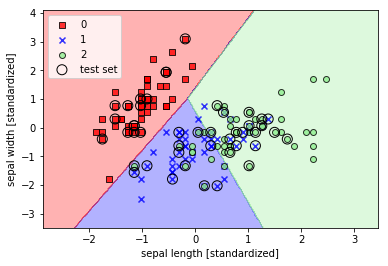

In [5]:
>>> lr = LogisticRegression(C=10e10,random_state=1)
>>> lr.fit(X_train_std, y_train)
>>> print ('Number of iterations:',lr.n_iter_)

>>> X_combined_std = np.vstack((X_train_std,X_test_std))
>>> y_combined = np.hstack((y_train,y_test))
>>> plot_decision_regions(X_combined_std,
...                       y_combined, 
...                       classifier=lr,
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal length [standardized]')
>>> plt.ylabel('sepal width [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()

In [6]:
# Get predictions
y_hat = lr.predict(X_train_std)
# Calculate accuracy on training data
print('train_accuracy:',np.mean(y_hat==y_train))

# Get predictions
y_hat = lr.predict(X_test_std)
# Calculate accuracy on test data
print('test_accuracy:',np.mean(y_hat==y_test))

train_accuracy: 0.857142857143
test_accuracy: 0.755555555556


In [7]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.857142857143
Test accuracy: 0.755555555556
Number of iterations: [26]

C: 10
Training accuracy: 0.857142857143
Test accuracy: 0.755555555556
Number of iterations: [20]

C: 1
Training accuracy: 0.828571428571
Test accuracy: 0.755555555556
Number of iterations: [12]

C: 0.1
Training accuracy: 0.819047619048
Test accuracy: 0.733333333333
Number of iterations: [5]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [8]:
# logistic regression with l2 regularization 
C = [100, 10, 1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.857142857143
Test accuracy: 0.755555555556
Number of iterations: [9]

C: 10
Training accuracy: 0.838095238095
Test accuracy: 0.755555555556
Number of iterations: [7]

C: 1
Training accuracy: 0.819047619048
Test accuracy: 0.755555555556
Number of iterations: [6]

C: 0.1
Training accuracy: 0.819047619048
Test accuracy: 0.733333333333
Number of iterations: [4]

C: 0.01
Training accuracy: 0.819047619048
Test accuracy: 0.733333333333
Number of iterations: [3]



In [9]:
# selecting sepal length and petal length 
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0, 2]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [10]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

Number of iterations: [11]


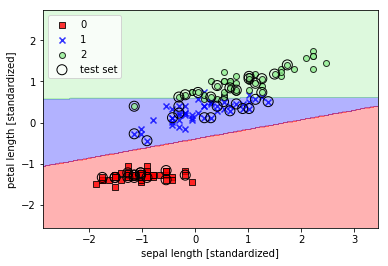

In [11]:
>>> lr = LogisticRegression(C=10e10,random_state=1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_) 

>>> X_combined_std = np.vstack((X_train_std,X_test_std))
>>> y_combined = np.hstack((y_train,y_test))
>>> plot_decision_regions(X_combined_std,
...                       y_combined, 
...                       classifier=lr,
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal length [standardized]')
>>> plt.ylabel('petal length [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()

In [12]:
# Get predictions
y_hat = lr.predict(X_train_std)
# Calculate accuracy on training data
print('train_accuracy:',np.mean(y_hat==y_train))

# Get predictions
y_hat = lr.predict(X_test_std)
# Calculate accuracy on test data
print('test_accuracy:',np.mean(y_hat==y_test))

train_accuracy: 0.942857142857
test_accuracy: 0.977777777778


In [13]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.942857142857
Test accuracy: 0.977777777778
Number of iterations: [29]

C: 10
Training accuracy: 0.942857142857
Test accuracy: 0.955555555556
Number of iterations: [34]

C: 1
Training accuracy: 0.933333333333
Test accuracy: 0.822222222222
Number of iterations: [23]

C: 0.1
Training accuracy: 0.752380952381
Test accuracy: 0.688888888889
Number of iterations: [14]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [14]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.942857142857
Test accuracy: 0.955555555556
Number of iterations: [9]

C: 10
Training accuracy: 0.92380952381
Test accuracy: 0.888888888889
Number of iterations: [7]

C: 1
Training accuracy: 0.857142857143
Test accuracy: 0.711111111111
Number of iterations: [5]

C: 0.1
Training accuracy: 0.809523809524
Test accuracy: 0.666666666667
Number of iterations: [4]

C: 0.01
Training accuracy: 0.733333333333
Test accuracy: 0.688888888889
Number of iterations: [4]



In [15]:
# selecting sepal length and petal width
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0, 3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [16]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

Number of iterations: [11]


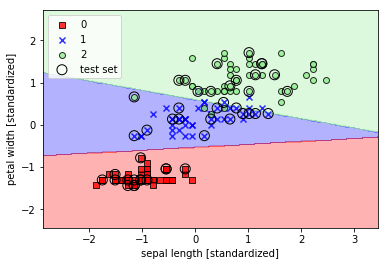

In [17]:
>>> lr = LogisticRegression(C=10e10,random_state=1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)
>>> X_combined_std = np.vstack((X_train_std,X_test_std))
>>> y_combined = np.hstack((y_train,y_test))
>>> plot_decision_regions(X_combined_std,
...                       y_combined, 
...                       classifier=lr,
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal length [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()

In [18]:
# Get predictions
y_hat = lr.predict(X_train_std)
# Calculate accuracy on training data
print('train_accuracy:',np.mean(y_hat==y_train))

# Get predictions
y_hat = lr.predict(X_test_std)
# Calculate accuracy on test data
print('test_accuracy:',np.mean(y_hat==y_test))

train_accuracy: 0.933333333333
test_accuracy: 0.955555555556


In [19]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.933333333333
Test accuracy: 0.955555555556
Number of iterations: [19]

C: 10
Training accuracy: 0.933333333333
Test accuracy: 0.955555555556
Number of iterations: [16]

C: 1
Training accuracy: 0.904761904762
Test accuracy: 0.911111111111
Number of iterations: [16]

C: 0.1
Training accuracy: 0.771428571429
Test accuracy: 0.711111111111
Number of iterations: [10]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [20]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.933333333333
Test accuracy: 0.955555555556
Number of iterations: [8]

C: 10
Training accuracy: 0.92380952381
Test accuracy: 0.888888888889
Number of iterations: [7]

C: 1
Training accuracy: 0.87619047619
Test accuracy: 0.777777777778
Number of iterations: [5]

C: 0.1
Training accuracy: 0.771428571429
Test accuracy: 0.711111111111
Number of iterations: [4]

C: 0.01
Training accuracy: 0.704761904762
Test accuracy: 0.644444444444
Number of iterations: [4]



In [21]:
# selecting sepal width and petal length
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1, 2]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [22]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

Number of iterations: [11]


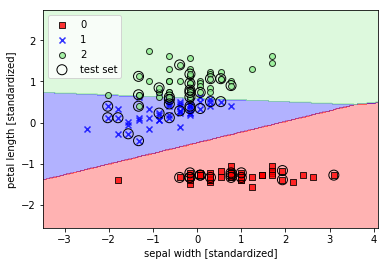

In [23]:
>>> lr = LogisticRegression(C=10e10,random_state=1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)
>>> X_combined_std = np.vstack((X_train_std,X_test_std))
>>> y_combined = np.hstack((y_train,y_test))
>>> plot_decision_regions(X_combined_std,
...                       y_combined, 
...                       classifier=lr,
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal width [standardized]')
>>> plt.ylabel('petal length [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()

In [24]:
# Get predictions
y_hat = lr.predict(X_train_std)
# Calculate accuracy on test data
print('train_accuracy:',np.mean(y_hat==y_train))

# Get predictions
y_hat = lr.predict(X_test_std)
# Calculate accuracy on test data
print('test_accuracy:',np.mean(y_hat==y_test))

train_accuracy: 0.942857142857
test_accuracy: 0.977777777778


In [25]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.933333333333
Test accuracy: 0.977777777778
Number of iterations: [34]

C: 10
Training accuracy: 0.92380952381
Test accuracy: 0.977777777778
Number of iterations: [36]

C: 1
Training accuracy: 0.904761904762
Test accuracy: 0.911111111111
Number of iterations: [24]

C: 0.1
Training accuracy: 0.809523809524
Test accuracy: 0.777777777778
Number of iterations: [7]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [26]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.92380952381
Test accuracy: 0.977777777778
Number of iterations: [8]

C: 10
Training accuracy: 0.914285714286
Test accuracy: 0.911111111111
Number of iterations: [7]

C: 1
Training accuracy: 0.857142857143
Test accuracy: 0.866666666667
Number of iterations: [6]

C: 0.1
Training accuracy: 0.828571428571
Test accuracy: 0.822222222222
Number of iterations: [4]

C: 0.01
Training accuracy: 0.809523809524
Test accuracy: 0.777777777778
Number of iterations: [5]



In [27]:
# selecting sepal width and petal width
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1, 3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [28]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

Number of iterations: [11]


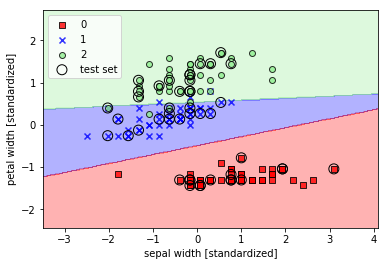

In [29]:
>>> lr = LogisticRegression(C=10e10,random_state=1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)
>>> X_combined_std = np.vstack((X_train_std,X_test_std))
>>> y_combined = np.hstack((y_train,y_test))
>>> plot_decision_regions(X_combined_std,
...                       y_combined, 
...                       classifier=lr,
...                       test_idx=range(105, 150))
>>> plt.xlabel('sepal width [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()

In [30]:
# Get predictions
y_hat = lr.predict(X_train_std)
# Calculate accuracy on test data
print('train_accuracy:',np.mean(y_hat==y_train))

# Get predictions
y_hat = lr.predict(X_test_std)
# Calculate accuracy on test data
print('test_accuracy:',np.mean (y_hat==y_test))

train_accuracy: 0.933333333333
test_accuracy: 1.0


In [31]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.933333333333
Test accuracy: 1.0
Number of iterations: [24]

C: 10
Training accuracy: 0.942857142857
Test accuracy: 1.0
Number of iterations: [26]

C: 1
Training accuracy: 0.904761904762
Test accuracy: 0.955555555556
Number of iterations: [18]

C: 0.1
Training accuracy: 0.866666666667
Test accuracy: 0.866666666667
Number of iterations: [6]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [32]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.942857142857
Test accuracy: 1.0
Number of iterations: [8]

C: 10
Training accuracy: 0.933333333333
Test accuracy: 0.977777777778
Number of iterations: [7]

C: 1
Training accuracy: 0.885714285714
Test accuracy: 0.866666666667
Number of iterations: [6]

C: 0.1
Training accuracy: 0.866666666667
Test accuracy: 0.844444444444
Number of iterations: [4]

C: 0.01
Training accuracy: 0.847619047619
Test accuracy: 0.844444444444
Number of iterations: [4]



In [33]:
# selecting petal length and petal width
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [2, 3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [34]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)

Number of iterations: [11]


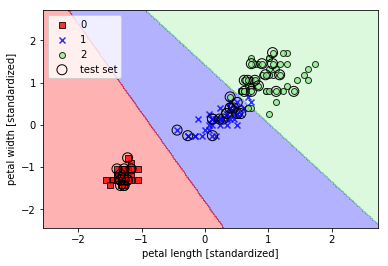

In [35]:
>>> lr = LogisticRegression(C=10e10,random_state=1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)
>>> X_combined_std = np.vstack((X_train_std,X_test_std))
>>> y_combined = np.hstack((y_train,y_test))
>>> plot_decision_regions(X_combined_std,
...                       y_combined, 
...                       classifier=lr,
...                       test_idx=range(105, 150))
>>> plt.xlabel('petal length [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()

In [36]:
# Get predictions
y_hat = lr.predict(X_train_std)
# Calculate accuracy on test data
print('train_accuracy:',np.mean(y_hat==y_train))

# Get predictions
y_hat = lr.predict(X_test_std)
# Calculate accuracy on test data
print('test_accuracy:',np.mean(y_hat==y_test))

train_accuracy: 0.952380952381
test_accuracy: 0.977777777778


In [37]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [34]

C: 10
Training accuracy: 0.952380952381
Test accuracy: 0.955555555556
Number of iterations: [27]

C: 1
Training accuracy: 0.942857142857
Test accuracy: 0.955555555556
Number of iterations: [24]

C: 0.1
Training accuracy: 0.752380952381
Test accuracy: 0.688888888889
Number of iterations: [6]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [38]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [9]

C: 10
Training accuracy: 0.942857142857
Test accuracy: 1.0
Number of iterations: [7]

C: 1
Training accuracy: 0.92380952381
Test accuracy: 0.933333333333
Number of iterations: [6]

C: 0.1
Training accuracy: 0.771428571429
Test accuracy: 0.733333333333
Number of iterations: [5]

C: 0.01
Training accuracy: 0.666666666667
Test accuracy: 0.666666666667
Number of iterations: [4]



In [39]:
# selecting sepal length, sepal width and petal length
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1,2]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [40]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> lr =LogisticRegression(C=10e10, random_state =1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)

Number of iterations: [11]


In [41]:
# Calculate accuracy on train data
print('train_accuracy:',lr.score(X_train_std,y_train))

# Calculate accuracy on train data
print('test_accuracy:',lr.score(X_test_std,y_test))

train_accuracy: 0.942857142857
test_accuracy: 0.977777777778


In [42]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.942857142857
Test accuracy: 0.977777777778
Number of iterations: [38]

C: 10
Training accuracy: 0.92380952381
Test accuracy: 0.977777777778
Number of iterations: [29]

C: 1
Training accuracy: 0.895238095238
Test accuracy: 0.911111111111
Number of iterations: [22]

C: 0.1
Training accuracy: 0.838095238095
Test accuracy: 0.777777777778
Number of iterations: [15]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [43]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.92380952381
Test accuracy: 0.977777777778
Number of iterations: [9]

C: 10
Training accuracy: 0.914285714286
Test accuracy: 0.866666666667
Number of iterations: [7]

C: 1
Training accuracy: 0.857142857143
Test accuracy: 0.777777777778
Number of iterations: [6]

C: 0.1
Training accuracy: 0.828571428571
Test accuracy: 0.777777777778
Number of iterations: [5]

C: 0.01
Training accuracy: 0.828571428571
Test accuracy: 0.777777777778
Number of iterations: [4]



In [44]:
# selecting sepal length, sepal width and petal width 
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1,3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [45]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> lr =LogisticRegression(C=10e10, random_state =1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)

Number of iterations: [11]


In [46]:
# Calculate accuracy on train data
print('train_accuracy:',lr.score(X_train_std,y_train))

# Calculate accuracy on train data
print('test_accuracy:',lr.score(X_test_std,y_test))

train_accuracy: 0.952380952381
test_accuracy: 0.955555555556


In [47]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.955555555556
Number of iterations: [28]

C: 10
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [26]

C: 1
Training accuracy: 0.904761904762
Test accuracy: 0.933333333333
Number of iterations: [18]

C: 0.1
Training accuracy: 0.866666666667
Test accuracy: 0.822222222222
Number of iterations: [14]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [48]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.955555555556
Number of iterations: [9]

C: 10
Training accuracy: 0.92380952381
Test accuracy: 0.955555555556
Number of iterations: [7]

C: 1
Training accuracy: 0.904761904762
Test accuracy: 0.844444444444
Number of iterations: [6]

C: 0.1
Training accuracy: 0.857142857143
Test accuracy: 0.8
Number of iterations: [5]

C: 0.01
Training accuracy: 0.847619047619
Test accuracy: 0.8
Number of iterations: [4]



In [49]:
# selecting sepal length, petal length  and petal width 
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,2,3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [50]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> lr =LogisticRegression(C=10e10, random_state =1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)

Number of iterations: [11]


In [51]:
# Calculate accuracy on train data
print('train_accuracy:',lr.score(X_train_std,y_train))

# Calculate accuracy on train data
print('test_accuracy:',lr.score(X_test_std,y_test))

train_accuracy: 0.952380952381
test_accuracy: 0.977777777778


In [52]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [33]

C: 10
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [35]

C: 1
Training accuracy: 0.933333333333
Test accuracy: 0.888888888889
Number of iterations: [26]

C: 0.1
Training accuracy: 0.8
Test accuracy: 0.733333333333
Number of iterations: [13]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [53]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [9]

C: 10
Training accuracy: 0.933333333333
Test accuracy: 0.955555555556
Number of iterations: [7]

C: 1
Training accuracy: 0.904761904762
Test accuracy: 0.8
Number of iterations: [6]

C: 0.1
Training accuracy: 0.809523809524
Test accuracy: 0.733333333333
Number of iterations: [5]

C: 0.01
Training accuracy: 0.72380952381
Test accuracy: 0.688888888889
Number of iterations: [4]



In [54]:
# selecting sepal width,petal length  and petal width 
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [1,2,3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [55]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> lr =LogisticRegression(C=10e10, random_state =1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)

Number of iterations: [11]


In [56]:
# Calculate accuracy on train data
print('train_accuracy:',lr.score(X_train_std,y_train))

# Calculate accuracy on train data
print('test_accuracy:',lr.score(X_test_std,y_test))

train_accuracy: 0.952380952381
test_accuracy: 0.977777777778


In [57]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [40]

C: 10
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [25]

C: 1
Training accuracy: 0.92380952381
Test accuracy: 0.955555555556
Number of iterations: [19]

C: 0.1
Training accuracy: 0.866666666667
Test accuracy: 0.866666666667
Number of iterations: [10]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [58]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [9]

C: 10
Training accuracy: 0.942857142857
Test accuracy: 0.977777777778
Number of iterations: [7]

C: 1
Training accuracy: 0.895238095238
Test accuracy: 0.911111111111
Number of iterations: [6]

C: 0.1
Training accuracy: 0.857142857143
Test accuracy: 0.866666666667
Number of iterations: [5]

C: 0.01
Training accuracy: 0.828571428571
Test accuracy: 0.8
Number of iterations: [4]



In [59]:
# selecting sepal length,sepal width,petal length  and petal width 
>>> iris = datasets.load_iris()
>>> X = iris.data[:, [0,1,2,3]]
>>> y = iris.target
>>> print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [60]:
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=1, stratify=y)

>>> from sklearn.preprocessing import StandardScaler
>>> sc = StandardScaler()
>>> sc.fit(X_train)
>>> X_train_std = sc.transform(X_train)
>>> X_test_std = sc.transform(X_test)
>>> lr =LogisticRegression(C=10e10, random_state =1)
>>> lr.fit(X_train_std, y_train)
>>> print('Number of iterations:',lr.n_iter_)

Number of iterations: [11]


In [61]:
# Calculate accuracy on train data
print('train_accuracy:',lr.score(X_train_std,y_train))

# Calculate accuracy on train data
print('test_accuracy:',lr.score(X_test_std,y_test))

train_accuracy: 0.952380952381
test_accuracy: 0.977777777778


In [62]:
# logistic regression with l1 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.942857142857
Test accuracy: 0.977777777778
Number of iterations: [37]

C: 10
Training accuracy: 0.952380952381
Test accuracy: 0.977777777778
Number of iterations: [27]

C: 1
Training accuracy: 0.914285714286
Test accuracy: 0.955555555556
Number of iterations: [23]

C: 0.1
Training accuracy: 0.866666666667
Test accuracy: 0.822222222222
Number of iterations: [12]

C: 0.01
Training accuracy: 0.333333333333
Test accuracy: 0.333333333333
Number of iterations: [0]



In [63]:
# logistic regression with l2 regularization 
C = [100,10,1, .1, .01]

for c in C:
    lr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lr.fit(X_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', lr.score(X_train_std, y_train))
    print('Test accuracy:', lr.score(X_test_std, y_test))
    print('Number of iterations:',lr.n_iter_)
    print('')

C: 100
Training accuracy: 0.942857142857
Test accuracy: 0.977777777778
Number of iterations: [9]

C: 10
Training accuracy: 0.942857142857
Test accuracy: 0.977777777778
Number of iterations: [8]

C: 1
Training accuracy: 0.914285714286
Test accuracy: 0.844444444444
Number of iterations: [6]

C: 0.1
Training accuracy: 0.866666666667
Test accuracy: 0.8
Number of iterations: [5]

C: 0.01
Training accuracy: 0.847619047619
Test accuracy: 0.8
Number of iterations: [3]



In [64]:
import pandas as pd
df = pd.read_excel("summary.xlsx")
df

,Features,Number of iterations without regularization,Training accuracy,Testing accuracy,Number of iterations with l1 regularization,Training accuracy .1,Testing accuracy,Number of iterations with l2 regularization,Training accuracy .2,Testing accuracy .1
0,Sepal length and Sepal width at C = 100,NaN,NaN,NaN,26.0,0.85,0.75,9.0,0.85,0.75
1,at C = 10,NaN,NaN,NaN,20.0,0.85,0.75,7.0,0.83,0.75
2,at C = 1,NaN,NaN,NaN,13.0,0.82,0.75,6.0,0.81,0.75
3,at C = 0.1,NaN,NaN,NaN,5.0,0.81,0.73,4.0,0.81,0.73
4,at C = 0.01,NaN,NaN,NaN,0.0,0.33,0.33,3.0,0.81,0.73
5,at C = 10e10,12.0,0.85,0.75,NaN,NaN,NaN,NaN,NaN,NaN
6,sepal length and petal length at C = 100,NaN,NaN,NaN,33.0,0.94,0.97,9.0,0.94,0.95
7,at C = 10,NaN,NaN,NaN,30.0,0.94,0.95,7.0,0.92,0.88
8,at C = 1,NaN,NaN,NaN,18.0,0.93,0.82,5.0,0.85,0.71
9,at C = 0.1,NaN,NaN,NaN,11.0,0.75,0.68,4.0,0.80,0.66


Discussion:

The accuracy of both training and testing data is high in case of the logistic regression using the l2 regularization with C value of 10e10. here, I assumed it as a negligible regularization as I have increased the C value. However, the accuracy of the test and train data when trained on a l1 or l2 regularization is low when compared for 2 features. when we increase the features, then logistic regression is prone to overfitting. this problem is eliminated by using the l1 and l2 regularization methods. However, when compared to l1,l2 yields a better accuracy. the C value which is inverse of regularization strength also plays a major role. the number of iterations the algorithm takes to converge is based on the C value. if we increase the C value then we will get more number of iterations and it decreases with decrease in the C value. after doing a set of trials by varying the C value, we can get an optimum result of both the regularization when we fix the C value as 1 or lower.